#**Deep Learning Project #1: Air Quality Forecasting**

The objective of this project is to develop a deep learning model using LSTM to predict/forecast Air Quality based on Time-Series Data. The steps included EDA, preprocessing, modelling, model evaluation, model modification, and overall evaluation.

##Import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


##Load Data

The data used was a Time-Series Data of Air Quality.

In [ ]:
df = pd.read_csv("AP004.csv")
df

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-09-05 14:00:00,2017-09-05 15:00:00,25.00,45.00,1.80,12.20,7.90,10.20,5.60,0.35,...,30.30,69.00,3.20,213.00,372.00,747.00,0.10,33.80,0.00,0.50
1,2017-09-05 15:00:00,2017-09-05 16:00:00,23.00,49.50,0.65,14.55,8.28,8.85,4.52,0.41,...,30.00,70.50,4.10,140.00,290.75,747.25,0.05,32.22,0.00,0.48
2,2017-09-05 16:00:00,2017-09-05 17:00:00,18.00,55.75,4.00,26.58,17.40,6.23,5.35,0.38,...,29.85,88.00,2.82,174.75,300.25,747.00,0.00,28.30,0.93,0.53
3,2017-09-05 17:00:00,2017-09-05 18:00:00,19.75,33.50,1.63,21.78,12.92,8.30,5.30,0.48,...,29.25,88.75,1.72,231.50,225.50,747.75,0.00,28.77,0.00,1.85
4,2017-09-05 18:00:00,2017-09-05 19:00:00,14.00,28.00,1.07,26.38,14.90,3.42,4.68,0.43,...,28.05,88.50,1.97,105.25,11.25,748.25,0.00,28.25,0.00,2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48797,2023-03-31 19:00:00,2023-03-31 20:00:00,10.75,29.25,2.98,8.18,6.77,6.10,8.90,0.50,...,NaN,67.00,4.97,186.25,3.00,751.75,0.06,33.58,0.00,0.53
48798,2023-03-31 20:00:00,2023-03-31 21:00:00,9.75,28.75,3.15,9.88,7.77,6.10,10.43,0.68,...,NaN,70.75,3.70,162.75,3.00,752.00,0.07,32.52,0.00,0.50
48799,2023-03-31 21:00:00,2023-03-31 22:00:00,16.75,33.75,2.95,14.32,10.00,7.90,12.17,0.86,...,NaN,73.25,3.33,128.75,3.00,752.50,0.07,31.20,0.00,0.75
48800,2023-03-31 22:00:00,2023-03-31 23:00:00,12.75,34.75,1.98,13.60,8.80,10.12,18.57,0.76,...,NaN,75.00,3.55,120.25,3.50,753.00,0.06,30.85,0.00,0.70


##EDA and Early Preprocessing

###Check time duration

In [ ]:
df['From Date'] = pd.to_datetime(df['From Date'])
df['To Date'] = pd.to_datetime(df['To Date'])
df['Duration'] = df['To Date'] - df['From Date']
df['Duration'].unique()

<TimedeltaArray>
['0 days 01:00:00']
Length: 1, dtype: timedelta64[ns]

This is necessary to see whether the duration from column 'From Date' to column 'To Date" for all data is constant because if it's not, then the 'To Date' column can't be deleted. The result shows an exactly 1 hour duration for all data. Hence, the 'To Date' column will be deleted after duplicates check and the 'From Date' column will be the index column.

###Changing the index to 'From Date'

In [ ]:
df.set_index('From Date', inplace=True)
df.head()

,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),...,RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3),Duration
From Date,,,,,,,,,,,,,,,,,,,,,
2017-09-05 14:00:00,2017-09-05 15:00:00,25.00,45.00,1.80,12.20,7.90,10.20,5.60,0.35,79.50,...,69.00,3.20,213.00,372.00,747.00,0.10,33.80,0.00,0.50,0 days 01:00:00
2017-09-05 15:00:00,2017-09-05 16:00:00,23.00,49.50,0.65,14.55,8.28,8.85,4.52,0.41,62.50,...,70.50,4.10,140.00,290.75,747.25,0.05,32.22,0.00,0.48,0 days 01:00:00
2017-09-05 16:00:00,2017-09-05 17:00:00,18.00,55.75,4.00,26.58,17.40,6.23,5.35,0.38,40.50,...,88.00,2.82,174.75,300.25,747.00,0.00,28.30,0.93,0.53,0 days 01:00:00
2017-09-05 17:00:00,2017-09-05 18:00:00,19.75,33.50,1.63,21.78,12.92,8.30,5.30,0.48,34.43,...,88.75,1.72,231.50,225.50,747.75,0.00,28.77,0.00,1.85,0 days 01:00:00
2017-09-05 18:00:00,2017-09-05 19:00:00,14.00,28.00,1.07,26.38,14.90,3.42,4.68,0.43,33.00,...,88.50,1.97,105.25,11.25,748.25,0.00,28.25,0.00,2.17,0 days 01:00:00


### Check data type

In [ ]:
df.dtypes

,0
To Date,datetime64[ns]
PM2.5 (ug/m3),float64
PM10 (ug/m3),float64
NO (ug/m3),float64
NO2 (ug/m3),float64
NOx (ppb),float64
NH3 (ug/m3),float64
SO2 (ug/m3),float64
CO (mg/m3),float64
Ozone (ug/m3),float64


To identify any data anomaly in terms of data type that require further preprocessing. In fact, there is no data anomaly found in this data.

###Check duplicated data

In [ ]:
df.duplicated().sum()

np.int64(0)

To check if there is any duplicated data that should be removed. The result shows there is no duplicated data found.

###Check missing valur for each variable

In [ ]:
df.isnull().sum()

,0
To Date,0
PM2.5 (ug/m3),2458
PM10 (ug/m3),1885
NO (ug/m3),1558
NO2 (ug/m3),1578
NOx (ppb),2174
NH3 (ug/m3),1662
SO2 (ug/m3),2153
CO (mg/m3),2415
Ozone (ug/m3),1646


To identify any missing value in every variable that should be imputed because the model wouldn't run at all if there is any missing data.

Turns out, there are quite a large number of missing value in each variable, exept for variable 'To Date' and variable 'Duration' that will be removed later.

###Check outlier in each numeric variable

In [ ]:
df.columns

Index(['To Date', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
       'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)',
       'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'Temp (degree C)', 'RH (%)',
       'WS (m/s)', 'WD (degree)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)',
       'AT (degree C)', 'RF (mm)', 'Xylene (ug/m3)', 'Duration'],
      dtype='object')

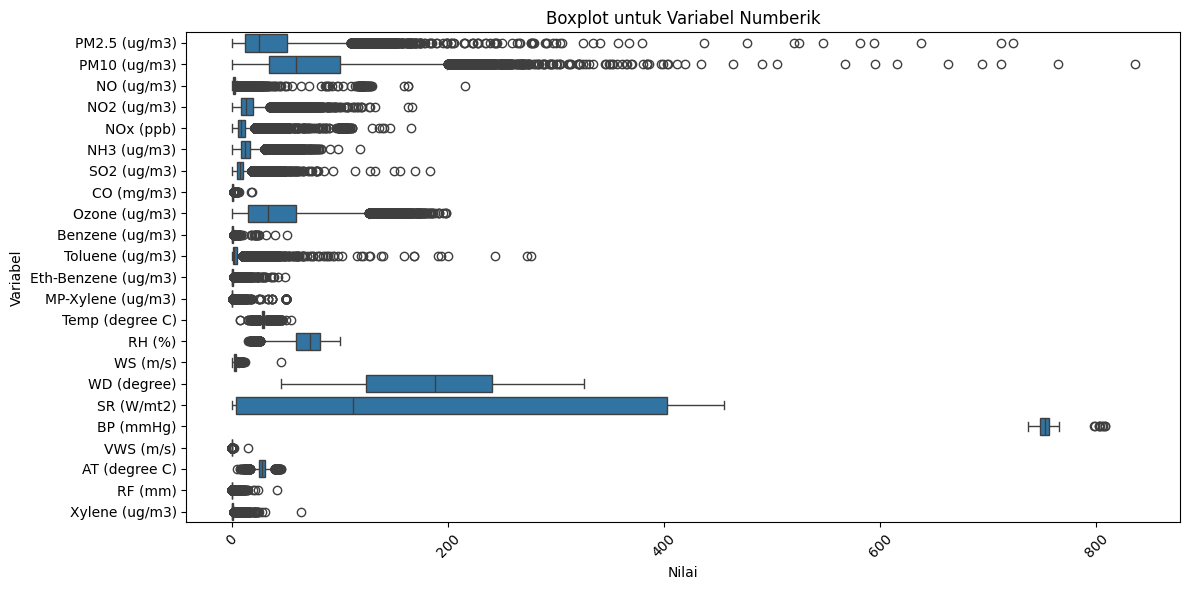

In [ ]:
var_num =['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)',
       'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)',
       'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'Temp (degree C)', 'RH (%)',
       'WS (m/s)', 'WD (degree)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)',
       'AT (degree C)', 'RF (mm)', 'Xylene (ug/m3)']

df_long = df[var_num].melt(var_name='Variabel', value_name='Nilai')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Nilai', y='Variabel', data=df_long)
plt.title('Boxplot untuk Variabel Numberik')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Untuk melihat apakah ada outlier di setiap variabel numerik karena akan memengaruhi keputusan metode imputasi missing data. Identification of outlier in every numeric variable is needed because it will affect on what imputation method will be used.

There are outliers in every numeric variable, except for variable 'WD (degree)' and 'SR (W/mt2)'. Therefore, the median value will be used to impute missing data in the said variable. Meanwhile, variable WD and SR will use the mean value to do the missing data imputation.

###Impute Missing Values

In [ ]:
mean_columns = ['WD (degree)', 'SR (W/mt2)']

# Column imputed with median (exept WD and SR)
median_columns = [col for col in var_num if col not in mean_columns]

# Impute missing values
for col in median_columns:
    df[col] = df[col].fillna(df[col].median())

for col in mean_columns:
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
df.isnull().sum()

,0
To Date,0
PM2.5 (ug/m3),0
PM10 (ug/m3),0
NO (ug/m3),0
NO2 (ug/m3),0
NOx (ppb),0
NH3 (ug/m3),0
SO2 (ug/m3),0
CO (mg/m3),0
Ozone (ug/m3),0


There is no missing data anymore because all missing data are already imputed.

###Statistical Summary

In [ ]:
df.describe()


,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),...,RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3),Duration
count,48802,48802.000000,48802.000000,48802.000000,48802.000000,48802.000000,48802.000000,48802.000000,48802.000000,48802.000000,...,48802.000000,48802.000000,48802.000000,48802.000000,48802.000000,48802.000000,48802.000000,48802.000000,48802.000000,48802
mean,2020-06-18 07:30:00,34.327267,71.140938,2.490047,15.204369,9.956262,13.332424,8.443773,0.690810,40.671908,...,69.641770,2.752604,184.428806,193.844929,752.043754,0.005940,28.089111,0.036861,0.718797,0 days 01:00:00
min,2017-09-05 15:00:00,0.250000,0.250000,0.030000,0.100000,0.000000,0.100000,0.100000,0.000000,0.200000,...,15.000000,0.200000,45.330000,0.000000,736.500000,-0.280000,4.500000,0.000000,0.000000,0 days 01:00:00
25%,2019-01-26 23:15:00,12.500000,35.500000,1.470000,8.600000,6.100000,8.330000,5.050000,0.440000,15.350000,...,59.750000,1.650000,125.000000,3.500000,748.000000,-0.020000,25.280000,0.000000,0.120000,0 days 01:00:00
50%,2020-06-18 07:30:00,25.000000,59.750000,1.900000,12.800000,8.470000,11.900000,7.250000,0.630000,33.230000,...,72.750000,2.550000,184.500000,161.000000,752.500000,0.000000,28.270000,0.000000,0.330000,0 days 01:00:00
75%,2021-11-08 15:45:00,49.330000,98.500000,2.550000,19.000000,11.920000,16.750000,10.150000,0.860000,58.580000,...,81.000000,3.620000,239.000000,400.750000,756.000000,0.040000,30.950000,0.000000,0.780000,0 days 01:00:00
max,2023-04-01 00:00:00,723.000000,835.500000,216.170000,166.250000,166.000000,118.250000,183.300000,18.690000,198.400000,...,100.000000,45.900000,326.000000,455.750000,808.250000,15.000000,45.850000,42.200000,64.020000,0 days 01:00:00
std,NaN,30.076699,47.425318,4.978533,10.254880,7.025488,7.717674,5.956410,0.427215,32.126080,...,14.689263,1.420944,64.411383,188.598909,4.973337,0.090978,4.389036,0.438836,1.281298,0 days 00:00:00


### Plot to see relationship between time and the target variable (AT)

In [ ]:
at_degree = pd.DataFrame(df["AT (degree C)"]).rename(columns={"AT (degree C)": "AT"})
at_degree.head()

,AT
From Date,
2017-09-05 14:00:00,33.80
2017-09-05 15:00:00,32.22
2017-09-05 16:00:00,28.30
2017-09-05 17:00:00,28.77
2017-09-05 18:00:00,28.25


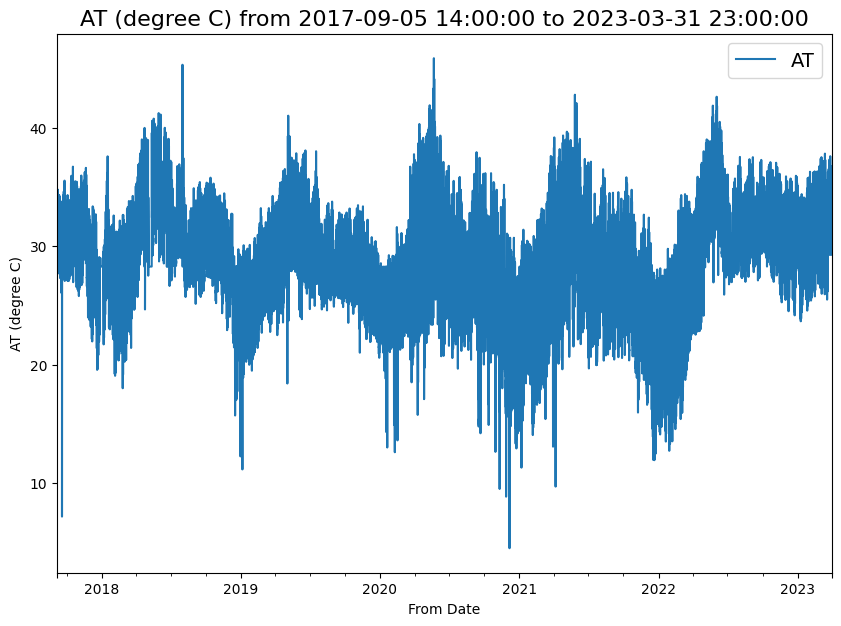

In [ ]:
at_degree.plot(figsize=(10, 7))
plt.ylabel("AT (degree C)")
plt.title("AT (degree C) from 2017-09-05 14:00:00 to 2023-03-31 23:00:00", fontsize=16)
plt.legend(fontsize=14);

Air Temperature (AT) reached its peak and lowest in the span of one year, that is in middle of year 2020 and at the end of the year 2020.

###Drop unwanted variables

In [ ]:
df = df.drop('To Date', axis=1)
df = df.drop('Duration', axis=1)
df

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
From Date,,,,,,,,,,,,,,,,,,,,,
2017-09-05 14:00:00,25.00,45.00,1.80,12.20,7.90,10.20,5.60,0.35,79.50,0.10,...,30.30,69.00,3.20,213.00,372.00,747.00,0.10,33.80,0.00,0.50
2017-09-05 15:00:00,23.00,49.50,0.65,14.55,8.28,8.85,4.52,0.41,62.50,0.15,...,30.00,70.50,4.10,140.00,290.75,747.25,0.05,32.22,0.00,0.48
2017-09-05 16:00:00,18.00,55.75,4.00,26.58,17.40,6.23,5.35,0.38,40.50,0.53,...,29.85,88.00,2.82,174.75,300.25,747.00,0.00,28.30,0.93,0.53
2017-09-05 17:00:00,19.75,33.50,1.63,21.78,12.92,8.30,5.30,0.48,34.43,0.48,...,29.25,88.75,1.72,231.50,225.50,747.75,0.00,28.77,0.00,1.85
2017-09-05 18:00:00,14.00,28.00,1.07,26.38,14.90,3.42,4.68,0.43,33.00,0.57,...,28.05,88.50,1.97,105.25,11.25,748.25,0.00,28.25,0.00,2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 19:00:00,10.75,29.25,2.98,8.18,6.77,6.10,8.90,0.50,7.12,0.43,...,28.75,67.00,4.97,186.25,3.00,751.75,0.06,33.58,0.00,0.53
2023-03-31 20:00:00,9.75,28.75,3.15,9.88,7.77,6.10,10.43,0.68,7.28,0.57,...,28.75,70.75,3.70,162.75,3.00,752.00,0.07,32.52,0.00,0.50
2023-03-31 21:00:00,16.75,33.75,2.95,14.32,10.00,7.90,12.17,0.86,7.05,0.83,...,28.75,73.25,3.33,128.75,3.00,752.50,0.07,31.20,0.00,0.75


Why dropping right at this moment? It is because if it is dropped before checking duplicated data, then there will be so many duplicated data due to the duration of this dataset that is only 1 hour. In the context of air condition, it is very possible for the features to not have any change only in the span of 1 hour and that pettern also should be indcluded in the model's decision because it is very time related.

##Split Data

In [ ]:
train_df = df.iloc[:int(0.8 * len(df))]
val_df   = df.iloc[int(0.8 * len(df)):int(0.9 * len(df))]
test_df  = df.iloc[int(0.9 * len(df)):]


##Preprocess

###Scaling Data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_df)

train_scaled = pd.DataFrame(scaler.transform(train_df), columns=df.columns, index=train_df.index)
val_scaled   = pd.DataFrame(scaler.transform(val_df), columns=df.columns, index=val_df.index)
test_scaled  = pd.DataFrame(scaler.transform(test_df), columns=df.columns, index=test_df.index)


###Make window-horizon sequence for every dataset

In [ ]:
import numpy as np

def create_sequences(df, target_col, window):
    data = df.values
    target_index = df.columns.get_loc(target_col)

    X, y = [], []

    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window, target_index])

    return np.array(X), np.array(y)


In [ ]:
X_train, y_train = create_sequences(train_scaled, 'AT (degree C)', window=5)
X_val, y_val     = create_sequences(val_scaled,   'AT (degree C)', window=5)
X_test, y_test   = create_sequences(test_scaled,  'AT (degree C)', window=5)


###Visualization of Train Set, Validation Set, dan Test Set for variable 'AT'

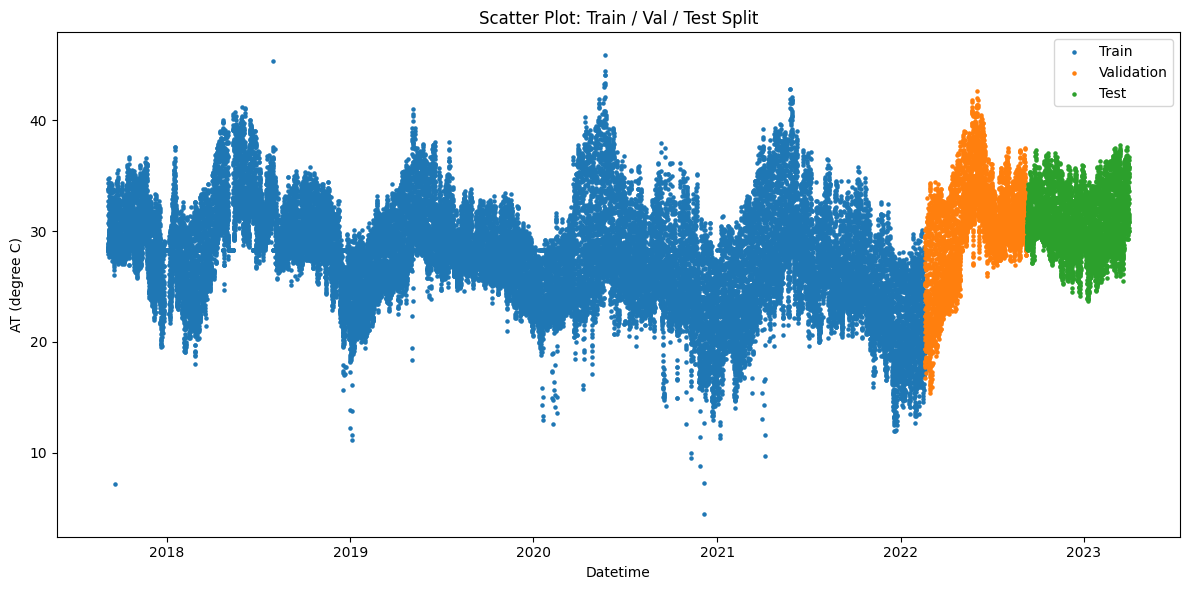

In [ ]:
def plot_splits_scatter(train_df, val_df, test_df, target_col='AT (degree C)'):
    plt.figure(figsize=(12, 6))
    plt.scatter(train_df.index, train_df[target_col], s=5, label='Train')
    plt.scatter(val_df.index, val_df[target_col], s=5, label='Validation')
    plt.scatter(test_df.index, test_df[target_col], s=5, label='Test')

    plt.xlabel("Datetime")
    plt.ylabel(target_col)
    plt.title("Scatter Plot: Train / Val / Test Split")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_splits_scatter(train_df, val_df, test_df, target_col='AT (degree C)')



## Baseline Model

### Build baseline model

In [ ]:
def build_lstm_model(input_shape, hidden_size=10):
    model = Sequential([
        LSTM(hidden_size, input_shape=input_shape),
        Dense(1, activation='linear')  # output regresi
    ])

    model.compile(
        loss='mse',             # karena ini regresi
        optimizer='adam',
        metrics=['mae']
    )

    return model


In [ ]:
model_baseline = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
model_baseline.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10)             │         1,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,371 (5.36 KB)

 Trainable params: 1,371 (5.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_baseline = model_baseline.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0249 - mae: 0.0966 - val_loss: 0.0023 - val_mae: 0.0383
Epoch 2/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0015 - mae: 0.0279 - val_loss: 0.0013 - val_mae: 0.0283
Epoch 3/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0011 - mae: 0.0223 - val_loss: 8.0381e-04 - val_mae: 0.0221
Epoch 4/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 8.1136e-04 - mae: 0.0189 - val_loss: 6.3065e-04 - val_mae: 0.0195
Epoch 5/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 7.2269e-04 - mae: 0.0173 - val_loss: 5.5810e-04 - val_mae: 0.0182
Epoch 6/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 6.7887e-04 - mae: 0.0165 - val_loss: 5.5265e-04 - val_mae: 0.0180
Epoch 7/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 6.6865e-04 - mae: 0.0161 - val_loss: 4.1870e-04 - val_mae: 0.0154
Epoch 8/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 6.0270e-04 - mae: 0.0152 - val_loss: 5.4439e-04 - val_mae: 0.0

###Evaluation for Baseline Model

In [ ]:
def evaluate_model(y_true_scaled, y_pred_scaled, scaler, df_columns, target_col='AT (degree C)'):
    target_idx = df_columns.index(target_col)

    y_true_full = np.zeros((len(y_true_scaled), len(df_columns)))
    y_pred_full = np.zeros((len(y_pred_scaled), len(df_columns)))

    y_true_full[:, target_idx] = y_true_scaled
    y_pred_full[:, target_idx] = y_pred_scaled

    # Inverse transform and retrive target column because it was already scaled.
    # So, must be converted to the real format (celcius)
    y_true_inv = scaler.inverse_transform(y_true_full)[:, target_idx]
    y_pred_inv = scaler.inverse_transform(y_pred_full)[:, target_idx]

    # Calculate the metrics
    mae = mean_absolute_error(y_true_inv, y_pred_inv)
    mse = mean_squared_error(y_true_inv, y_pred_inv)
    r2 = r2_score(y_true_inv, y_pred_inv)
    mape = mean_absolute_percentage_error(y_true_inv, y_pred_inv)

    print(f"MAE  : {mae:.4f} °C")
    print(f"MSE  : {mse:.4f}")
    print(f"R²   : {r2:.4f}")
    print(f"MAPE : {mape:.2%}")

    return {
        "mae": mae,
        "mse": mse,
        "r2": r2,
        "mape": mape
    }


In [ ]:
# Make prediction
y_pred_baseline = model_baseline.predict(X_test).flatten()

# Evaluation
evaluation_base = evaluate_model(
    y_true_scaled=y_test,
    y_pred_scaled=y_pred_baseline,
    scaler=scaler,
    df_columns=list(df.columns),
    target_col='AT (degree C)'
)



153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MAE  : 0.5446 °C
MSE  : 0.5101
R²   : 0.9279
MAPE : 1.78%


MAE shows that the difference between the prediction and real data is only 0.5446 °C. MSE shows that the error in prediction and the result is quite low. R² shows that the model have already succeed in explaining 92.79% variance of the real data. MAPE shows that the mean percentage error is only 1.78%. So, in general, the model is already fairly accurate.

##Modified Model

Modification is done by adding layer, using dropout for regularization, and setting learning rate in Adam Optimizer.

###Modify model

Modification :


1.   Adding layer to enhance the model's complexity
2.   Adding dropout for regulatization and avoid overfitting
3.   Enlarge hidden layer for bigger capasity
4.   Decrease learning rate specifically for better convergence



In [ ]:

def modify(input_shape, hidden_size=64, dropout_rate=0.2, learning_rate=0.0005):
    model = Sequential([
        LSTM(hidden_size, return_sequences=True, input_shape=input_shape),
        Dropout(dropout_rate),
        LSTM(hidden_size // 2),
        Dropout(dropout_rate),
        Dense(1, activation='linear')  # regresi output
    ])

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(
        loss='mse',
        optimizer=optimizer,
        metrics=['mae']
    )

    return model


In [ ]:
model_mod = modify(
    input_shape=(X_train.shape[1], X_train.shape[2]),
    hidden_size=64,
    dropout_rate=0.2,
    learning_rate=0.0005
)

model_mod.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 5, 64)          │        22,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,977 (136.63 KB)

 Trainable params: 34,977 (136.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early Stopping to avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_mod = model_mod.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0144 - mae: 0.0836 - val_loss: 0.0018 - val_mae: 0.0336
Epoch 2/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0038 - mae: 0.0476 - val_loss: 0.0015 - val_mae: 0.0311
Epoch 3/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0027 - mae: 0.0400 - val_loss: 9.2381e-04 - val_mae: 0.0237
Epoch 4/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0019 - mae: 0.0330 - val_loss: 7.2289e-04 - val_mae: 0.0206
Epoch 5/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0015 - mae: 0.0281 - val_loss: 6.0517e-04 - val_mae: 0.0185
Epoch 6/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0012 - mae: 0.0244 - val_loss: 5.4591e-04 - val_mae: 0.0177
Epoch 7/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0011 - mae: 0.0221 - val_loss: 9.3950e-04 - val_mae: 0.0252
Epoch 8/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 9.2456e-04 - mae: 0.0208 - val_loss: 4.9161e-04 - val_mae: 0.0167
Epo

Model stopped in epoch 22 before overfit happens.

###Evaluation for modified model

In [ ]:
# Prediction
y_pred_mod = model_mod.predict(X_test).flatten()

# Evaluation
evaluation_mod = evaluate_model(
    y_true_scaled=y_test,
    y_pred_scaled=y_pred_mod,
    scaler=scaler,
    df_columns=list(df.columns),
    target_col='AT (degree C)'
)



153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE  : 0.5014 °C
MSE  : 0.4566
R²   : 0.9355
MAPE : 1.63%


 MAE shows that the model has decreased the error between predictions and real data to only 0.5014 °C. MSE also shows lower value than the baseline model. R² shows that model already explaining 93.55% variance of the real data. MAPE shows that the mean pecentage error also decreased to only 1.63%. Hence, overall, the accuracy is enhanced and the modification succeeded.

##Comparison

In [ ]:
def print_evaluation(title, evaluation):
    print("-" * 40)
    print(f"{title}")
    print(f"MAE  : {evaluation['mae']:.4f} °C")
    print(f"MSE  : {evaluation['mse']:.4f}")
    print(f"RMSE : {evaluation['rmse']:.4f} °C")
    print(f"R²   : {evaluation['r2']:.4f}")
    print(f"MAPE : {evaluation['mape']*100:.2f}%")

print_evaluation("Baseline Model Evaluation", evaluation_base)
print_evaluation("Modified Model Evaluation", evaluation_mod)


----------------------------------------
Baseline Model Evaluation
MAE  : 0.5446 °C
MSE  : 0.5101
RMSE : 0.7142 °C
R²   : 0.9279
MAPE : 1.78%
----------------------------------------
Modified Model Evaluation
MAE  : 0.5014 °C
MSE  : 0.4566
RMSE : 0.6758 °C
R²   : 0.9355
MAPE : 1.63%
